<a href="https://colab.research.google.com/github/majid-lotfian/CEPRuleGenerator/blob/master/AI-AGENT-FLAML_CBC-Dataset_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (2).json
Dataset URL: https://www.kaggle.com/datasets/abdelrhmankaram/complete-blood-count-cbc-test
License(s): unknown
complete-blood-count-cbc-test.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  complete-blood-count-cbc-test.zip
  inflating: ./cbc_data/CBC-Dataset.csv  
✅ Dataset loaded successfully.
   GENDER     WBC    NE#    LY#   MO#   EO#   BA#   RBC    HGB    HCT  ...  \
0       1  106.32  93.10   6.01  1.72  1.67  3.82  4.27  12.40  38.10  ...   
1       1   89.31   7.67  78.98  0.54  0.04  2.09  4.97  11.46  36.44  ...   
2       1   85.73  75.17   4.55  4.34  0.20  1.46  4.99  14.68  46.96  ...   
3       1   73.09   3.42  66.45  0.76  0.09  2.37  4.37  13.24  39.30  ...   
4       1   60.87   3.23  54.05  1.67  0.30  1.61  3.62  10.89  33.21  ...   

      PLT    MPV   PCT    PDW      SD   SDTSD        TSD  FERRITTE  FOLATE  \
0  240.00   8.70  0.21   8.50   85.00  409.40  20.762091    195.40    

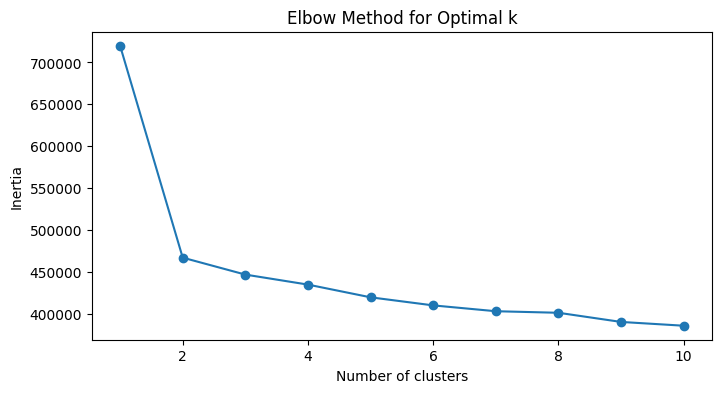

✅ Clustering done. Here are some samples:
Cluster
0          15322
2           7347
1           7331
Name: count, dtype: int64


In [5]:
# ✅ Google Colab Project: Clustering on CBC Blood Test Dataset ✅

# ───────────────────────────────────────────────────────────────────────
# STEP 1: Install required libraries
!pip install -q pandas scikit-learn matplotlib kaggle

# ───────────────────────────────────────────────────────────────────────
# STEP 2: Upload kaggle.json and download CBC dataset
from google.colab import files
uploaded = files.upload()  # Upload your kaggle.json here manually

import os
import json
os.makedirs("/root/.kaggle", exist_ok=True)
with open("kaggle.json", "r") as f:
    kaggle_token = json.load(f)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_token, f)
os.chmod("/root/.kaggle/kaggle.json", 600)

!kaggle datasets download -d abdelrhmankaram/complete-blood-count-cbc-test
!unzip -o complete-blood-count-cbc-test.zip -d ./cbc_data

# ───────────────────────────────────────────────────────────────────────
# STEP 3: Load the dataset
import pandas as pd

# Corrected filename (replace space with hyphen)
df = pd.read_csv("./cbc_data/CBC-Dataset.csv")
print("✅ Dataset loaded successfully.")
print(df.head())

# ───────────────────────────────────────────────────────────────────────
# STEP 4: Preprocessing
from sklearn.preprocessing import StandardScaler

if 'Patient Id' in df.columns:
    df = df.drop(columns=['Patient Id'])

df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ───────────────────────────────────────────────────────────────────────
# STEP 5: Clustering with KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# ───────────────────────────────────────────────────────────────────────
# STEP 6: Final KMeans Clustering
# Assume k=3 for now (can be adjusted based on Elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add cluster labels to dataframe
df['Cluster'] = labels
print("✅ Clustering done. Here are some samples:")
print(df[['Cluster']].value_counts())

# ───────────────────────────────────────────────────────────────────────
# Done!

# Tip: You can visualize clusters using PCA or t-SNE if needed!